 # <h1 style='background:#F7B2B0; border:0; color:black'><center>FETAL HEALTH</center></h1> 
 

Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress. 

 CTG interpretation helps in determining if the pregnancy is high or low risk.  An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus. 

**On This Dataset**
**Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
1. Suspect
1. Pathological

**Features**

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability 
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

# **<span style="color:#F7B2B0;">TABLE OF CONTENTS</span>**

**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA PREPROCESSING**

**DATA ANALYSIS**

**MODEL BUILDING**

**CONCLUSIONS AND RESULT**



 # **<span style="color:#F7B2B0;">IMPORTING LIBRARIES</span>**

In [ ]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# # #
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# # #
## validation functions

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## clasification model
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(0)


# **<span style="color:#F7B2B0;">LOADING DATA</span>**

### mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_edited = pd.read_csv('/content/drive/MyDrive/cartiography_nima/fetal_health -Edited.csv')
data_edited.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,129,0.011,0.030,0.003,0.0,0.0,0.0,37.0,1.2,0.0,...,93.0,195,8.0,0.0,187.0,157.0,153.0,137,0,1
1,129,0.008,0.054,0.002,0.0,0.0,0.0,37.0,1.3,0.0,...,55.0,195,7.0,4.0,186.0,151.0,144.0,177,0,1
2,158,0.008,0.027,0.002,0.0,0.0,0.0,NaN,0.9,0.0,...,151.0,198,4.0,0.0,186.0,178.0,180.0,15,0,1
3,158,0.010,0.029,0.003,0.0,0.0,0.0,41.0,0.8,0.0,...,153.0,198,2.0,0.0,186.0,180.0,183.0,11,1,1
4,158,0.010,0.031,0.003,0.0,0.0,0.0,40.0,0.9,0.0,...,158.0,198,1.0,0.0,186.0,182.0,186.0,9,1,1


### Information of Data

In [ ]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2086 non-null   int64  
 1   accelerations                                           2086 non-null   float64
 2   fetal_movement                                          2079 non-null   float64
 3   uterine_contractions                                    2061 non-null   float64
 4   light_decelerations                                     2054 non-null   float64
 5   severe_decelerations                                    2086 non-null   float64
 6   prolongued_decelerations                                2054 non-null   float64
 7   abnormal_short_term_variability                         2043 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data_edited.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2086.0,133.276127,9.810946,106.0,126.000,133.000,140.000,160.000
accelerations,2086.0,0.003174,0.003864,0.0,0.000,0.002,0.006,0.019
fetal_movement,2079.0,0.009559,0.047163,0.0,0.000,0.000,0.002,0.481
uterine_contractions,2061.0,0.005598,0.033062,0.0,0.002,0.004,0.007,0.900
light_decelerations,2054.0,0.003558,0.038661,0.0,0.000,0.000,0.003,0.900
severe_decelerations,2086.0,0.000003,0.000058,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2054.0,0.000150,0.000568,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2043.0,46.883994,17.226860,12.0,32.000,49.000,61.000,87.000
percentage_of_time_with_abnormal_long_term_variability,2045.0,9.835697,18.394258,0.0,0.000,0.000,11.000,91.000
mean_value_of_long_term_variability,2040.0,8.153382,5.536825,0.0,4.600,7.400,10.800,50.700


# **<span style="color:#F7B2B0;">Preprocessing Data and Cleaning</span>**

### remove unwanted characters "?" and replace with Nan

In [ ]:
print(data_edited.isnull().sum())

baseline value                                             0
accelerations                                              0
fetal_movement                                             7
uterine_contractions                                      25
light_decelerations                                       32
severe_decelerations                                       0
prolongued_decelerations                                  32
abnormal_short_term_variability                           43
mean_value_of_short_term_variability                      45
percentage_of_time_with_abnormal_long_term_variability    41
mean_value_of_long_term_variability                       46
histogram_width                                           25
histogram_min                                             55
histogram_max                                             59
histogram_number_of_peaks                                 37
histogram_number_of_zeroes                                32
histogram_mode          

In [ ]:
print("view 39'histogram_max value before cleaning = ",data_edited.histogram_max[39])

view 39'histogram_max value before cleaning =  ?


In [ ]:
data_edited = data_edited.replace("?",np.nan)

In [ ]:
print("view 39'histogram_max value after cleaning = ",data_edited.histogram_max[39])

view 39'histogram_max value after cleaning =  nan


### preprocessing missing data

In [ ]:
print(data_edited.isnull().sum())

baseline value                                             0
accelerations                                              0
fetal_movement                                             7
uterine_contractions                                      25
light_decelerations                                       32
severe_decelerations                                       0
prolongued_decelerations                                  32
abnormal_short_term_variability                           43
mean_value_of_short_term_variability                      85
percentage_of_time_with_abnormal_long_term_variability    41
mean_value_of_long_term_variability                       46
histogram_width                                           25
histogram_min                                             55
histogram_max                                             85
histogram_number_of_peaks                                 37
histogram_number_of_zeroes                                32
histogram_mode          

####1- replace missing value with 0

In [ ]:
# data_edited_fill0 = data_edited.fillna(0)
# print(data_edited_fill0.isnull().sum())

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

####2- remove missing value 

In [ ]:
# data_edited_remove0 = data_edited.notnull()
# print(data_edited_remove0.isnull().sum())

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

####3- missing value handeling with statistical

In [ ]:
def missing_handeling(strategy, dataframe):
  train_most_frequent = dataframe.copy()
  mean_imputer = SimpleImputer(strategy=strategy)# strategy can also be mean, most_frequent or median 
  train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)
  return train_most_frequent

##3-1 mean 
# data_edited = missing_handeling('mean', data_edited)
# data_edited.isnull().sum()

##3-2 meadian
data_edited = missing_handeling('median', data_edited)
data_edited.isnull().sum()

##3-3_most_frequent
# data_edited = missing_handeling('most_frequent', data_edited)
# data_edited.isnull().sum()


### edit data type

In [ ]:
data_edited['histogram_max'] = data_edited['histogram_max'].astype(float)
data_edited['mean_value_of_short_term_variability'] = data_edited['mean_value_of_short_term_variability'].astype(float)

In [ ]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2086 non-null   float64
 1   accelerations                                           2086 non-null   float64
 2   fetal_movement                                          2086 non-null   float64
 3   uterine_contractions                                    2086 non-null   float64
 4   light_decelerations                                     2086 non-null   float64
 5   severe_decelerations                                    2086 non-null   float64
 6   prolongued_decelerations                                2086 non-null   float64
 7   abnormal_short_term_variability                         2086 non-null   float64
 8   mean_value_of_short_term_variability  

### Check imbalance data if we need resampling

#### calculate number of rows from each class

In [ ]:
# calculate number of rows from each class
data_edited['fetal_health'].value_counts()

1.0    1628
2.0     291
3.0     167
Name: fetal_health, dtype: int64

#### Resampling data

In [ ]:
from sklearn.utils import resample 

first_class = data_edited[data_edited['fetal_health'] == 1]
second_class = data_edited[data_edited['fetal_health'] == 2]
thired_class = data_edited[data_edited['fetal_health'] == 3]

 #Downsampling minority class
df_first_downsampled = resample(first_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=291,    # to match majority class
                                 random_state=123) # reproducible results
 #Upsample minority class
df_thired_upsampled = resample(thired_class, 
                                 replace=True,     
                                 n_samples=291,    
                                 random_state=123)

print(len(df_thired_upsampled))
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_first_downsampled, df_thired_upsampled, second_class])
 
# Display new class counts
df_upsampled['fetal_health'].value_counts()

291


1.0    291
3.0    291
2.0    291
Name: fetal_health, dtype: int64

# resample data or not

In [ ]:
# # analyzed wit resample data 
# data = df_upsampled


# # analyzed without resample data 
data = data_edited

# **<span style="color:#F7B2B0;">DATA ANALYSIS</span>**

**The analysis consist of:**
* Count Plot
* Corelation Heat Map
* Implot
* Swarm And Boxen Plot


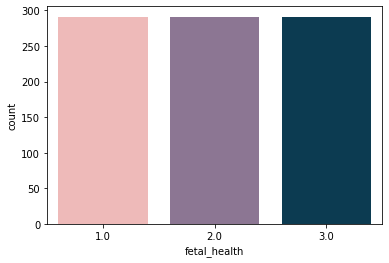

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy. 

The performance measures that would provide better insight:
* Confusion Matrix
* Precision
* Recall
* F1 Score 

Let us evaluate the correlation matrix.

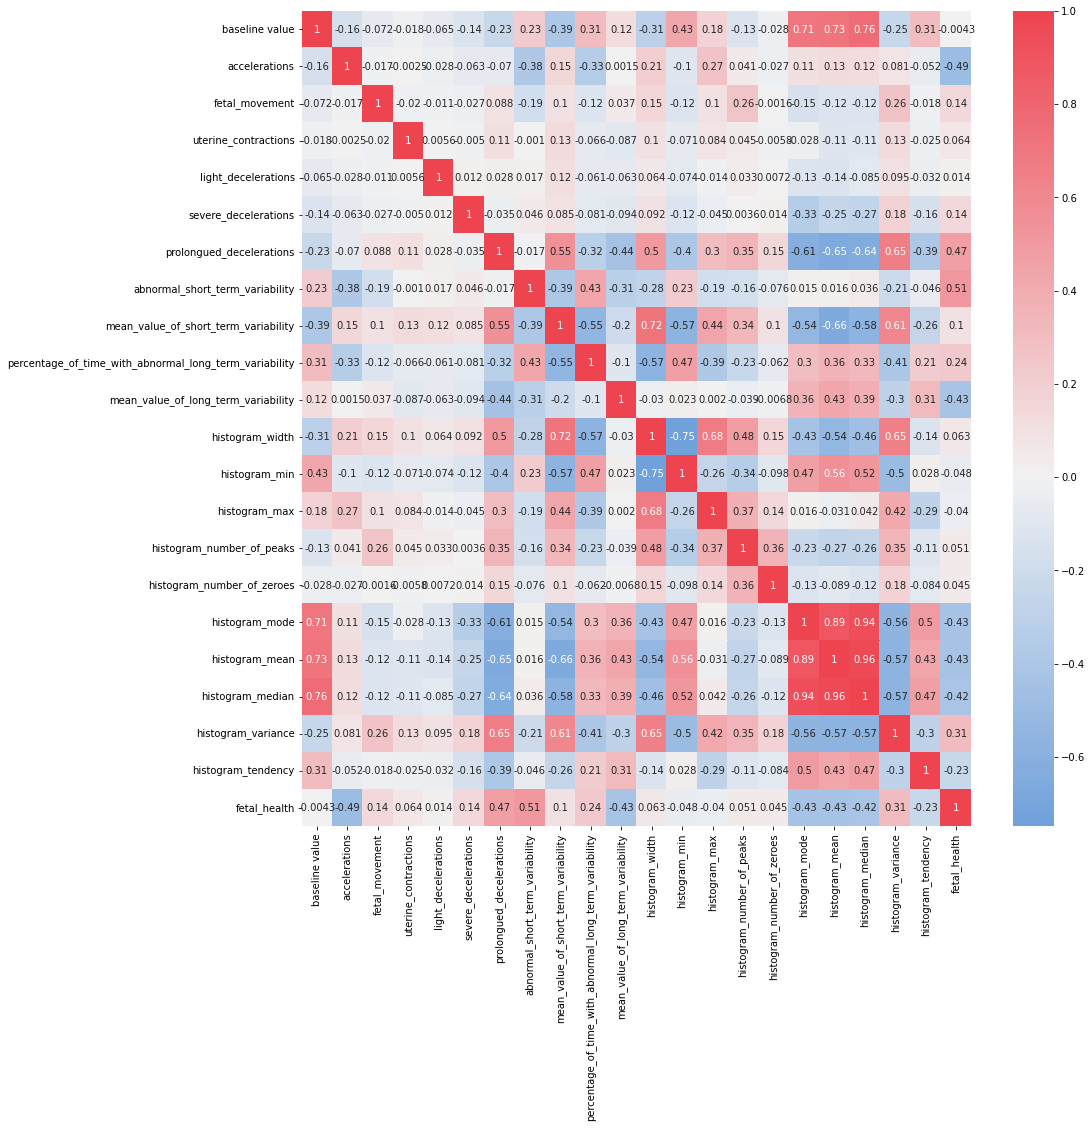

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health. 

**Accelerations Vs Fetal Movement by Fetal Health**

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


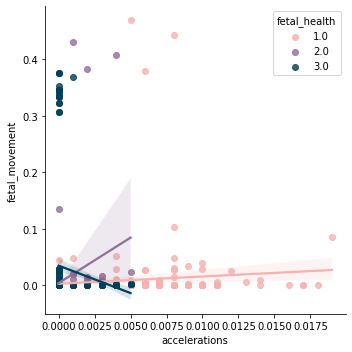

In [ ]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Prolongued Decelerations Vs Fetal Movement by Fetal Health**

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


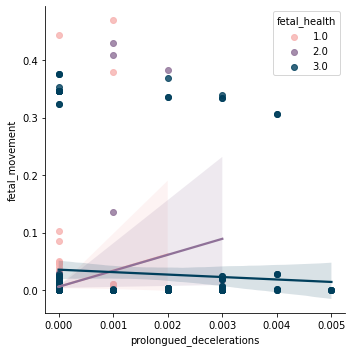

In [ ]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Abnormal Short Term Variability Vs Fetal Movement by Fetal Health**

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


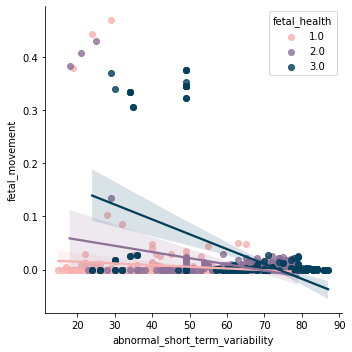

In [ ]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health**

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


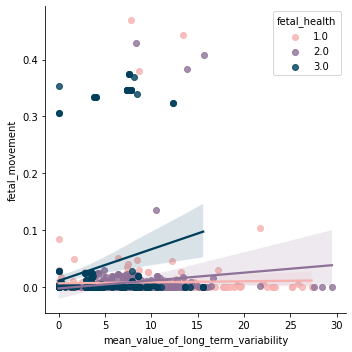

In [ ]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

We can see the rates of change of the above-mentioned values with each target show a specific trend. 
We can also spot outliers. Let's have a look at outliers on a more suitable plot.

In [ ]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


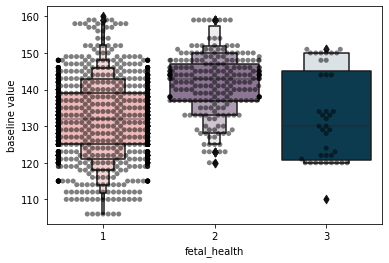

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


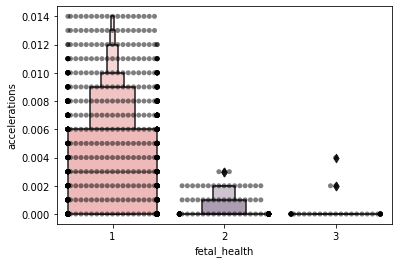

KeyboardInterrupt: ignored

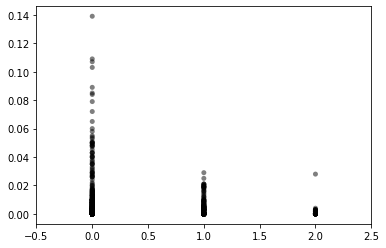

In [ ]:
for i in cols:
    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
    plt.show()

I spotted outliers on our dataset. However, it is not quite a good idea to remove them yet as it may lead to overfitting. Though we may end up with better statistics. 

A basic rule of thumb for the outliers in question is:

It is a measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation. In our case, this is the outcome of a CTG report so it is unlikely that this was a data entry error. 

If it is not a part of the population you are studying, you can legitimately remove the outlier. In this case, this all is about the fetus, and experts tag the classification. Let's stick with the expert opinion. 

Thus assuming that these are the natural part of the population we are studying, we should not remove it.

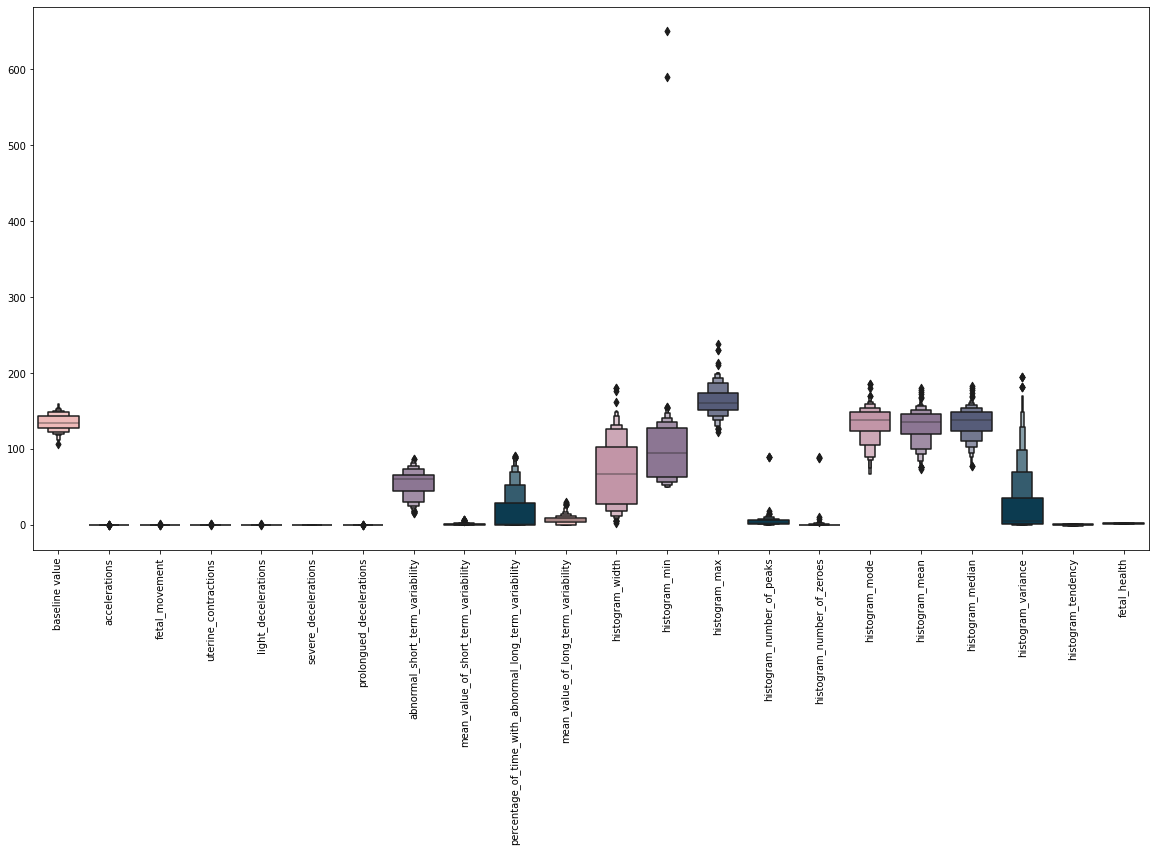

In [ ]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In the model building, we will preprocess the features to do the same.

### outlier detection

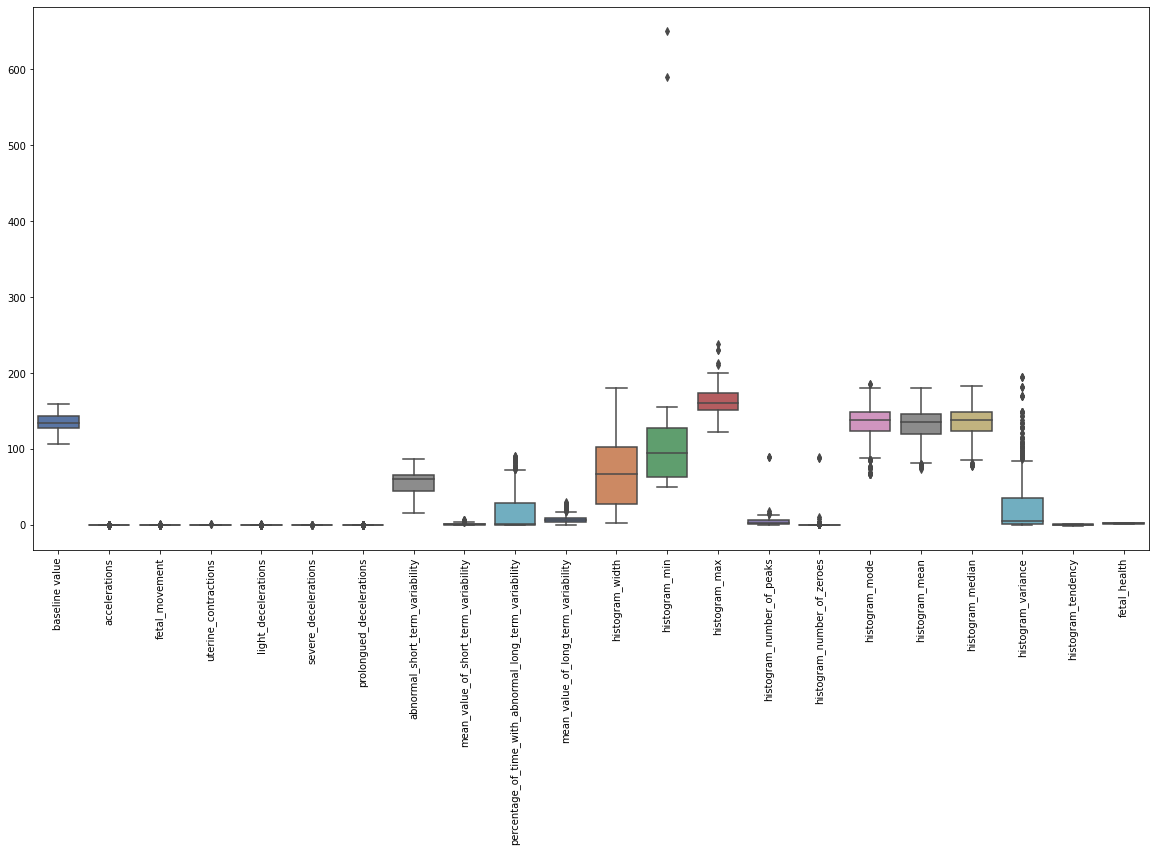

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,palette='deep')
plt.xticks(rotation=90)
plt.show()

## outlier removal with z-score

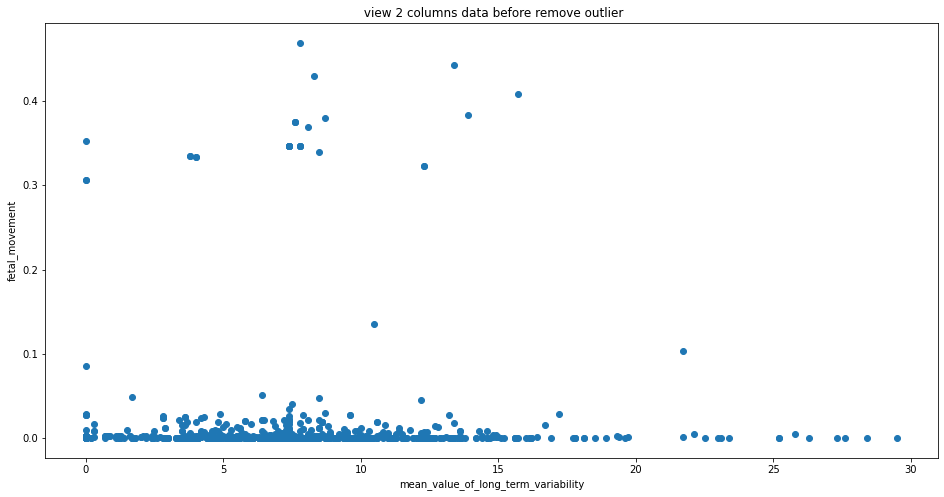

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['mean_value_of_long_term_variability'], data['fetal_movement'])
ax.set_xlabel('mean_value_of_long_term_variability')
ax.set_ylabel('fetal_movement')
plt.title(' view 2 columns data before remove outlier')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 1534 to 1918
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          873 non-null    float64
 1   accelerations                                           873 non-null    float64
 2   fetal_movement                                          873 non-null    float64
 3   uterine_contractions                                    873 non-null    float64
 4   light_decelerations                                     873 non-null    float64
 5   severe_decelerations                                    873 non-null    float64
 6   prolongued_decelerations                                873 non-null    float64
 7   abnormal_short_term_variability                         873 non-null    float64
 8   mean_value_of_short_term_variability

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 10,  17,  20,  22,  34,  57,  70,  71,  80,  85,  97, 114, 116,
       117, 124, 138, 148, 156, 162, 176, 183, 201, 206, 209, 222, 228,
       228, 229, 253, 266, 272, 276, 277, 278, 294, 298, 299, 299, 307,
       307, 310, 310, 314, 321, 323, 330, 330, 338, 338, 340, 344, 344,
       345, 349, 349, 349, 349, 350, 354, 357, 364, 365, 369, 372, 374,
       387, 389, 392, 393, 400, 400, 402, 403, 403, 404, 404, 407, 408,
       411, 414, 416, 418, 419, 419, 423, 423, 430, 431, 435, 435, 436,
       437, 451, 451, 455, 456, 456, 456, 456, 458, 467, 469, 471, 475,
       477, 478, 478, 481, 493, 493, 497, 499, 502, 504, 505, 505, 506,
       507, 512, 512, 513, 520, 524, 524, 526, 527, 537, 542, 542, 544,
       544, 548, 562, 565, 568, 568, 573, 573, 578, 632, 654, 681, 688,
       764, 775, 775, 827, 830, 841, 861]), array([ 1,  1, 10, 10, 13,  1,  2, 10,  4,  8,  1, 10,  1,  1, 10,  2,  1,
        1, 10,  2, 10,  1,  1,  1,  1,  8, 10, 10,  1,  1, 10, 10,  1,  1,
        2,  5

In [ ]:
data_without_outlier = data[(z < 3).all(axis=1)]

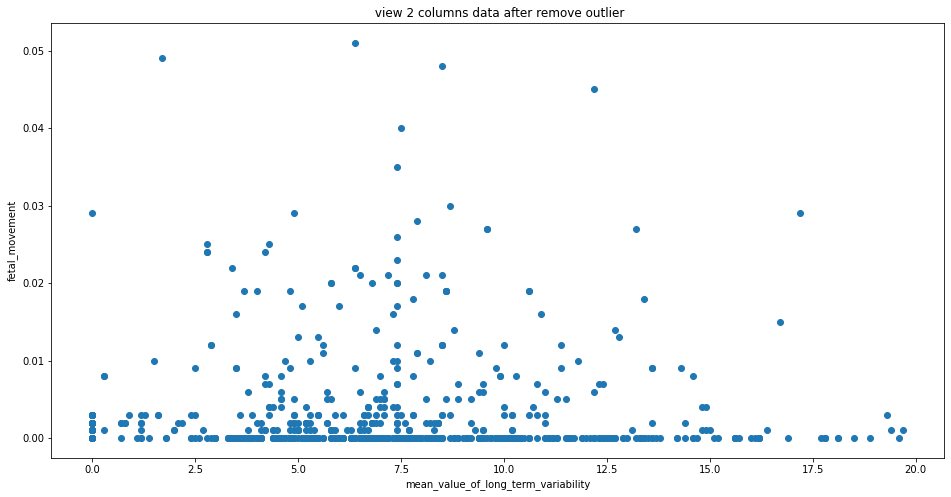

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_without_outlier['mean_value_of_long_term_variability'], data_without_outlier['fetal_movement'])
ax.set_xlabel('mean_value_of_long_term_variability')
ax.set_ylabel('fetal_movement')
plt.title(' view 2 columns data after remove outlier')
plt.show()

In [ ]:
data_without_outlier.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1534,112.0,0.010,0.000,0.005,0.000,0.0,0.0,24.0,1.3,5.0,...,105.0,144.0,0.0,0.0,114.0,116.0,116.0,5.0,-1.0,1.0
1389,120.0,0.003,0.008,0.004,0.000,0.0,0.0,41.0,1.1,0.0,...,105.0,172.0,4.0,0.0,123.0,127.0,126.0,16.0,-1.0,1.0
1406,127.0,0.000,0.000,0.006,0.000,0.0,0.0,62.0,0.5,73.0,...,119.0,131.0,1.0,0.0,123.0,124.0,125.0,0.0,0.0,1.0
1346,118.0,0.000,0.000,0.002,0.002,0.0,0.0,24.0,1.5,0.0,...,89.0,144.0,1.0,1.0,125.0,118.0,121.0,10.0,0.0,1.0
1122,125.0,0.000,0.000,0.004,0.000,0.0,0.0,37.0,0.8,15.0,...,103.0,161.0,1.0,0.0,131.0,129.0,131.0,1.0,1.0,1.0


In [ ]:
data = data_without_outlier

# **<span style="color:#F7B2B0;">MODEL SELECTION AND BUILDING</span>**
In this section we will:
* Set up features(X) and target(Y)
* Scale the features
* Split training and test sets 
* Model selection
* Hyperparameter tuning

### normalization without resample

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,753.0,-6.794034e-16,1.000665,-2.817867,-0.701209,-0.027726,0.838179,2.281356
accelerations,753.0,-7.548927e-17,1.000665,-0.541734,-0.541734,-0.541734,0.266840,3.501138
fetal_movement,753.0,-7.548927e-17,1.000665,-0.455019,-0.455019,-0.455019,-0.007917,7.145720
uterine_contractions,753.0,1.887232e-17,1.000665,-1.169243,-1.169243,-0.202789,0.763666,3.340877
light_decelerations,753.0,-1.887232e-17,1.000665,-0.601145,-0.601145,-0.601145,0.374420,4.276679
severe_decelerations,753.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
prolongued_decelerations,753.0,-2.830848e-17,1.000665,-0.432264,-0.432264,-0.432264,-0.432264,3.489362
abnormal_short_term_variability,753.0,-3.774463e-17,1.000665,-2.525715,-0.584233,0.265165,0.629193,1.842619
mean_value_of_short_term_variability,753.0,3.774463e-17,1.000665,-1.101642,-0.857157,-0.245946,0.487508,3.299081
percentage_of_time_with_abnormal_long_term_variability,753.0,3.774463e-17,1.000665,-0.755846,-0.755846,-0.552606,0.544887,2.821170


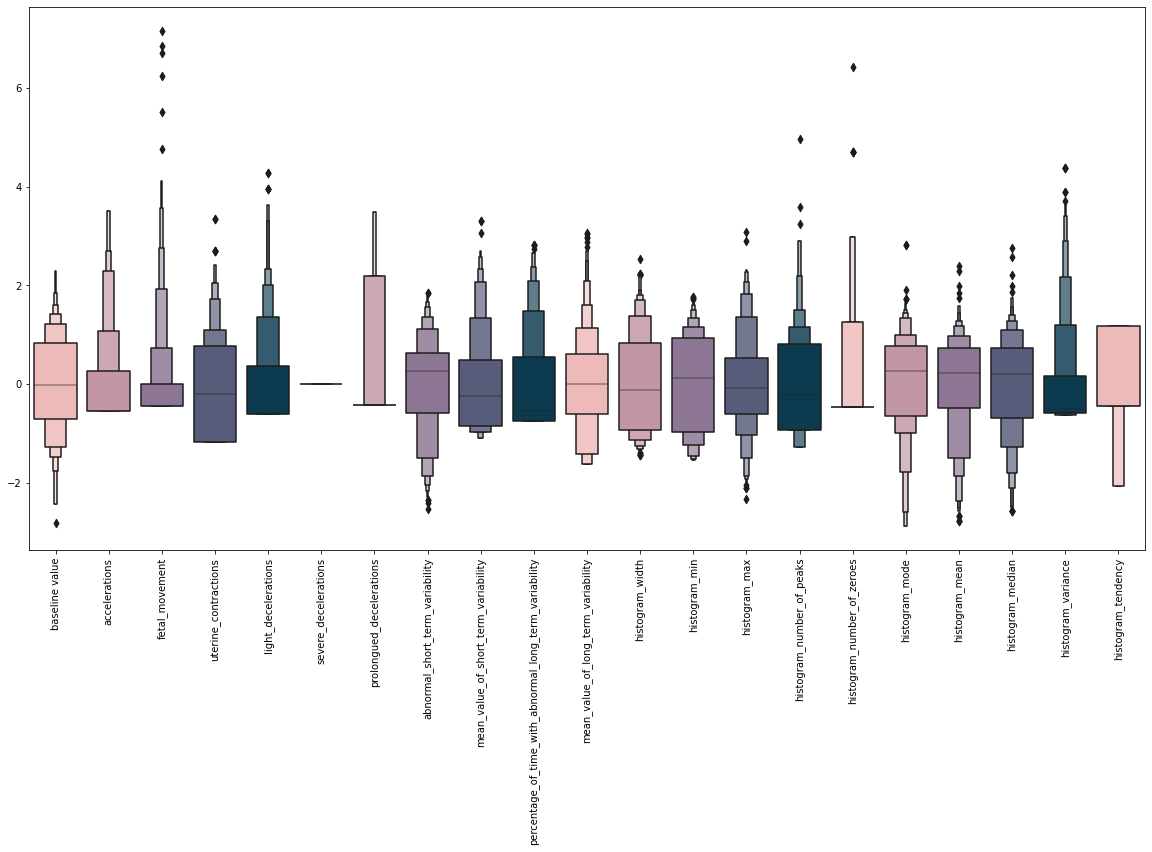

In [ ]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

### train test split

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

### Result and evaluations Functions

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def result(test, label, model, model_name):

    predicted= model.predict(test) 

    acccuracy = accuracy_score(label, predicted,)
    recall = recall_score(label, predicted, average="weighted")
    precision = precision_score(label, predicted, average="weighted")
    # f1_score = f1_score(label, predicted, average='macro')

    print(f"********** {model_name} Results *********")
    print("Accuracy    : ", acccuracy)
    print("Recall      : ", recall)
    print("Precision   : ", precision)
    # print("F1 Score    : ", f1_score)
    print('F1 score    : ', f1_score(label, predicted, average='macro'))
    conf_mat = confusion_matrix(label, predicted)
    print('#' * 50)
    print('*' * 10 , 'classification report','*' * 10 )
    print(classification_report(label, predicted))
    print('#' * 50)
    print('*' * 10 , 'Confusion Matrix:','*' * 10 )
    plot_confusion_matrix(conf_mat,[1 , 2 , 3])


## Classification Models

#### 1- decision tree

********** decision tree Results *********
Accuracy    :  0.9336283185840708
Recall      :  0.9336283185840708
Precision   :  0.9331989336362059
F1 score    :  0.9365510306686778
##################################################
********** classification report **********
              precision    recall  f1-score   support

         1.0       0.92      0.93      0.92        84
         2.0       0.92      0.88      0.90        78
         3.0       0.97      1.00      0.98        64

    accuracy                           0.93       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.93      0.93      0.93       226

##################################################
********** Confusion Matrix: **********


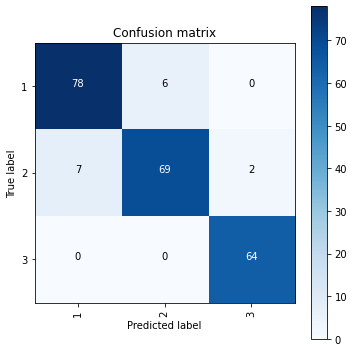

In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)
result(X_test, y_test, tree_model, 'decision tree')

#### 2- knn (KNeighborsClassifier)

********** knn Results *********
Accuracy    :  0.8451327433628318
Recall      :  0.8451327433628318
Precision   :  0.8491810763627985
F1 score    :  0.8472425098191968
##################################################
********** classification report **********
              precision    recall  f1-score   support

         1.0       0.90      0.85      0.87        84
         2.0       0.76      0.83      0.80        78
         3.0       0.89      0.86      0.87        64

    accuracy                           0.85       226
   macro avg       0.85      0.85      0.85       226
weighted avg       0.85      0.85      0.85       226

##################################################
********** Confusion Matrix: **********


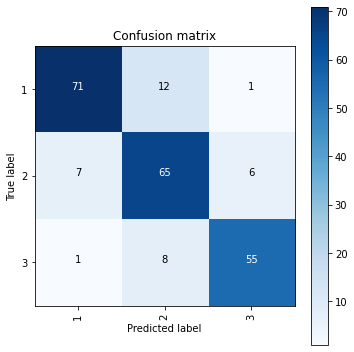

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3) ## hyper parameter 3,1
knn_model.fit(X_train,y_train)
result(X_test, y_test, knn_model, 'knn')

#### 3- Logestic Regression

********** Logestic regression Results *********
Accuracy    :  0.8495575221238938
Recall      :  0.8495575221238938
Precision   :  0.8546988807455829
F1 score    :  0.8507744510978044
##################################################
********** classification report **********
              precision    recall  f1-score   support

         1.0       0.89      0.81      0.85        84
         2.0       0.79      0.90      0.84        78
         3.0       0.89      0.84      0.86        64

    accuracy                           0.85       226
   macro avg       0.86      0.85      0.85       226
weighted avg       0.85      0.85      0.85       226

##################################################
********** Confusion Matrix: **********


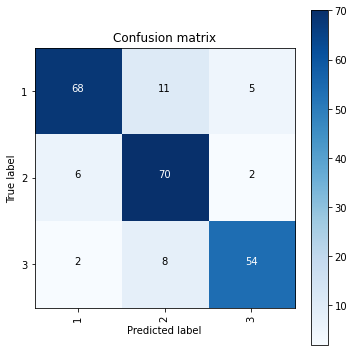

In [ ]:
logesticregression_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logesticregression_model.predict(X_test)
result(X_test, y_test, logesticregression_model, 'Logestic regression')

#### 4- SVM

********** SVC Results *********
Accuracy    :  0.8584070796460177
Recall      :  0.8584070796460177
Precision   :  0.8609324660495086
F1 score    :  0.8606343470842116
##################################################
********** classification report **********
              precision    recall  f1-score   support

         1.0       0.89      0.85      0.87        84
         2.0       0.80      0.86      0.83        78
         3.0       0.90      0.88      0.89        64

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226

##################################################
********** Confusion Matrix: **********


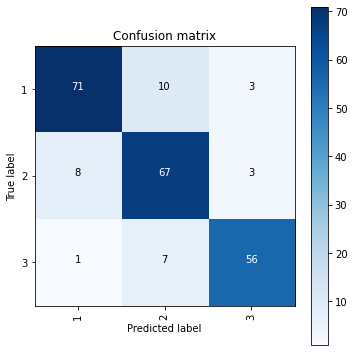

In [ ]:
svm_model = svm.SVC(kernel='linear', decision_function_shape='ovr') #linear, ‘poly’, ‘rbf’, sigmoid,
svm_model = svm_model.fit(X_train, y_train)
result(X_test, y_test, svm_model, 'SVC')

# cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# svm
scores_svm = cross_val_score(svm_model, X, y, cv=5)
print('SVM cross validation score:', scores_svm)

# knn
scores_knn = cross_val_score(knn_model, X, y, cv=5)
print('knn cross validation score:', scores_knn)


# decision tree
scores_tree_model = cross_val_score(tree_model, X, y, cv=5)
print('Decision tree cross validation score:', scores_tree_model)

#logestic
scores_logesticregression = cross_val_score(logesticregression_model, X, y, cv=5)
print('logesticregression cross validation score:', scores_logesticregression)

SVM cross validation score: [0.79470199 0.84768212 0.8013245  0.74666667 0.67333333]
knn cross validation score: [0.7218543  0.77483444 0.82781457 0.84666667 0.72      ]
Decision tree cross validation score: [0.64238411 0.90728477 0.90728477 0.87333333 0.69333333]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

logesticregression cross validation score: [0.74172185 0.79470199 0.83443709 0.72666667 0.70666667]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a id="5"></a> 
# <h1 style='background:#f7b2b0; border:0; color:black'><center>END</center></h1> 